<a href="https://colab.research.google.com/github/neelgupta28/ML-Case-Study/blob/main/MLCASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)


In [2]:
#Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Data Cleaning
df.drop("customerID", axis=1, inplace=True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.fillna(df.mean(numeric_only=True), inplace=True)



In [4]:
#Encode Categorical Features
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [5]:
#Feature–Target Split
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [6]:
#Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:

#Train / Validation / Test Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


In [8]:
#Train Models
lr = LogisticRegression()
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#Predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

lr_prob = lr.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]

In [10]:
#Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)



Logistic Regression
Accuracy : 0.8098391674550615
Precision: 0.698744769874477
Recall   : 0.5641891891891891
F1 Score : 0.6242990654205608

Random Forest
Accuracy : 0.7928098391674551
Precision: 0.6742081447963801
Recall   : 0.5033783783783784
F1 Score : 0.5764023210831721


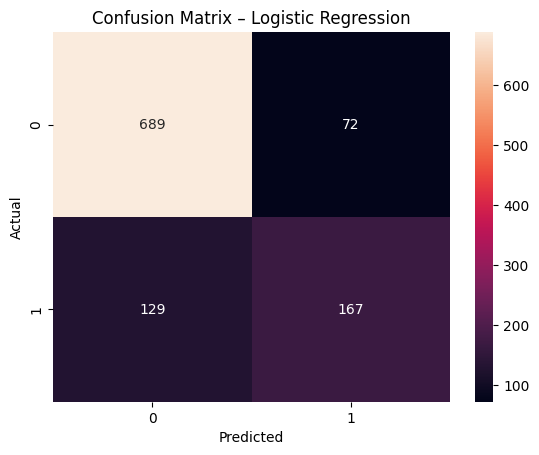

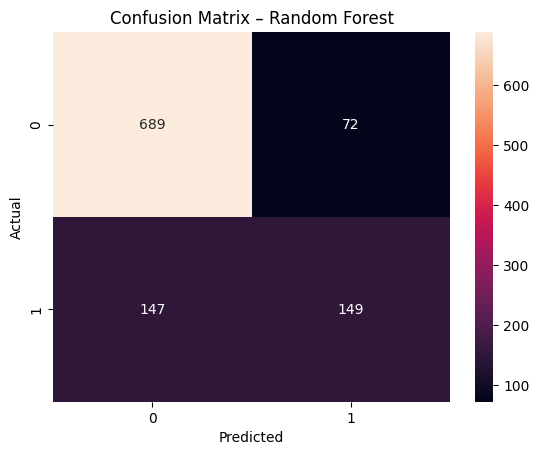

In [11]:
#Confusion Matrix (Graph)
plt.figure()
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure()
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

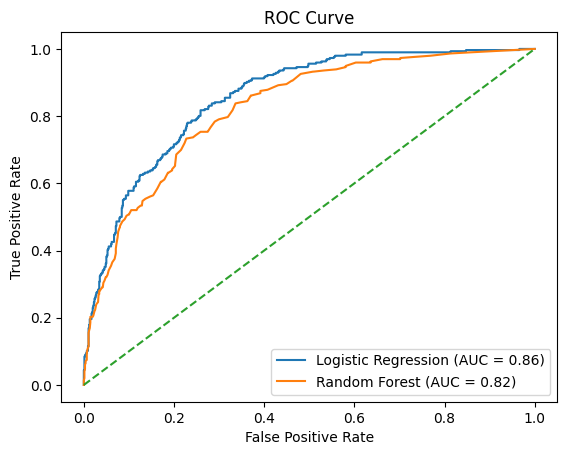

In [12]:

#ROC Curve & AUC (Mandatory Graph)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

plt.figure()
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:.2f})".format(
    roc_auc_score(y_test, lr_prob)
))
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:.2f})".format(
    roc_auc_score(y_test, rf_prob)
))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

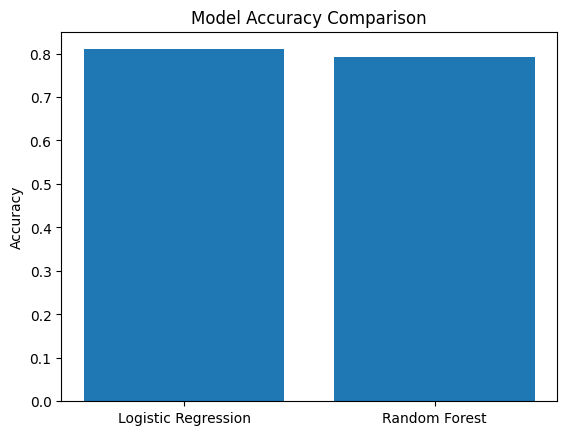

In [13]:

#Accuracy Comparison Bar Chart
models = ["Logistic Regression", "Random Forest"]
accuracy = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred)
]

plt.figure()
plt.bar(models, accuracy)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


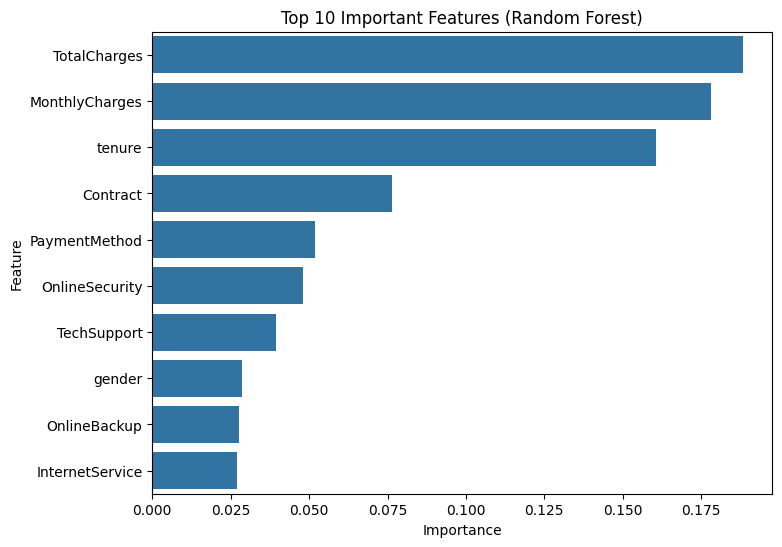

In [14]:
#Feature Importance (Random Forest)
importances = rf.feature_importances_
features = df.drop("Churn", axis=1).columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()